In [59]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline 

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Cyber Security Tweets | Elyse 

In [60]:
data = pd.read_csv('cybersecurity_tweets.csv')

In [61]:
data = data.drop_duplicates('text')
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x109082290,x1404488925935177737,2021-06-14 17:20:28,NcsVentures,"Signs, Causes and Solutions for Network Data Breaches | #cybersecurity | #cyberattack https://t.co/oxotVQ4ogO",WordPress.com,109,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/109082290/1488488011,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/ncsavatar_normal.png
1,x109082290,x1403635112613494786,2021-06-12 08:47:43,NcsVentures,Battling Chinese Big Tech encroachment in India | #cybersecurity | #cyberattack https://t.co/GFXaut9ZXH,WordPress.com,103,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/109082290/1488488011,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/ncsavatar_normal.png
2,x109082290,x1403747937818120198,2021-06-12 16:16:03,NcsVentures,Ask Dr. Jeanette® Success On “The Way” Devil On A Choke Chain! It’s Gonna Be Quick! It’s Gonna Be Sure! It’s Gonna Be Final! – Los Angeles Sentinel | Los Angeles Sentinel | #cybersecurity | #cyberattack https://t.co/0yfsRAdUMk,WordPress.com,226,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/109082290/1488488011,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/ncsavatar_normal.png
3,x109082290,x1404021845913899009,2021-06-13 10:24:28,NcsVentures,Cyber threats to Digital Pakistan | #cybersecurity | #cyberattack https://t.co/Se4ENqeOQT,WordPress.com,89,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/109082290/1488488011,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/ncsavatar_normal.png
4,x109082290,x1404053089804554241,2021-06-13 12:28:37,NcsVentures,Pakistan Cyber Attack News: Pakistan army claims major cyber attack by Indian intel | World News | #cybersecurity | #cyberattack https://t.co/wsnAO20OiG,WordPress.com,152,NaN,NaN,NaN,...,260725,0,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/109082290/1488488011,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/ncsavatar_normal.png


In [62]:
data.shape

(17656, 90)

In [111]:
len(data.user_id.unique()) # number of unique individuals

7635

In [63]:
df = data[["text", "is_quote", "is_retweet", "retweet_count", "hashtags", "followers_count"]]

In [64]:
text = df[["text"]][:10000] # using subset for now so it will run faster
pd.set_option('display.max_colwidth', -1)
text.head()

,text
0,"Signs, Causes and Solutions for Network Data Breaches | #cybersecurity | #cyberattack https://t.co/oxotVQ4ogO"
1,Battling Chinese Big Tech encroachment in India | #cybersecurity | #cyberattack https://t.co/GFXaut9ZXH
2,Ask Dr. Jeanette® Success On “The Way” Devil On A Choke Chain! It’s Gonna Be Quick! It’s Gonna Be Sure! It’s Gonna Be Final! – Los Angeles Sentinel | Los Angeles Sentinel | #cybersecurity | #cyberattack https://t.co/0yfsRAdUMk
3,Cyber threats to Digital Pakistan | #cybersecurity | #cyberattack https://t.co/Se4ENqeOQT
4,Pakistan Cyber Attack News: Pakistan army claims major cyber attack by Indian intel | World News | #cybersecurity | #cyberattack https://t.co/wsnAO20OiG


In [65]:
ident = data[["verified", "lang", "location", "followers_count", "description", "user_id"]] # can always change later
ident = identifying.drop_duplicates()
ident.head()

,verified,lang,location,followers_count,description
user_id,,,,,
x109082290,False,en,"Atlanta, GA",8524,"We are a leader in #news for #cybersecurity #hacker , #hacking, #techjobs, #NationalCyberSecurity Download our #app ""National Cyber Security 5.0"""
x194297917,False,en,United States,7288,Gregory D. Evans is a #CyberSecurity #Mogul & Founder of #NationalCyberSecurity | 1st Hacker to make $100M | Ex-Hacker | | #SecurityNews | #HackerNews
x1404297347950071818,False,en,NaN,0,NaN
x4439325029,False,en,NaN,82,NaN
x821567125785612288,False,en,United States,52913,"#IIoT_World™ is the first Global #DigitalPublication focused 100% on #IIoT, #Industry40, #SmartManufacturing #ICS #security. #1 Industrial IoT #Influencer."


## Cleaning Data

### Text Data

In [66]:
wnet = WordNetLemmatizer()
port = PorterStemmer()

In [67]:
def cleanTxt(txt):
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    return txt

In [68]:
text['text'] = text['text'].apply(cleanTxt)
text.head()

,text
0,signs causes and solutions for network data breaches cybersecurity cyberattack
1,battling chinese big tech encroachment in india cybersecurity cyberattack
2,ask dr jeanette success on the way devil on a choke chain its gonna be quick its gonna be sure its gonna be final los angeles sentinel los angeles sentinel cybersecurity cyberattack
3,cyber threats to digital pakistan cybersecurity cyberattack
4,pakistan cyber attack news pakistan army claims major cyber attack by indian intel world news cybersecurity cyberattack


In [69]:
def stopWords(txt): 
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words('english')]
    txt_lst = [wnet.lemmatize(word) for word in txt_lst]
    txt_lst = [word for word in txt_lst if word != '']
    txt_lst = [word for word in txt_lst if word != '\r\n\r\n'] # indicates space and indexing
    txt_lst = [word for word in txt_lst if word != 'u0001f449'] # indicates back hand emoji pointing right
    txt_lst = [word for word in txt_lst if word != 'cybersecurity']
    txt_lst = [word for word in txt_lst if word != 'cyber']
    txt_lst = [word for word in txt_lst if word != 'security']
    return " ".join(txt_lst)

In [70]:
text['text'] = text['text'].apply(stopWords)
text.head()

,text
0,sign cause solution network data breach cyberattack
1,battling chinese big tech encroachment india cyberattack
2,ask dr jeanette success way devil choke chain gonna quick gonna sure gonna final los angeles sentinel los angeles sentinel cyberattack
3,threat digital pakistan cyberattack
4,pakistan attack news pakistan army claim major attack indian intel world news cyberattack


### Identifying Data

In [71]:
ident.isna().sum()

verified           0   
lang               0   
location           1387
followers_count    0   
description        364 
dtype: int64

In [72]:
ident = ident.dropna()
ident.isna().sum()

verified           0
lang               0
location           0
followers_count    0
description        0
dtype: int64

In [73]:
ident['description'] = ident['description'].apply(cleanTxt)
ident.head()

,verified,lang,location,followers_count,description
user_id,,,,,
x109082290,False,en,"Atlanta, GA",8524,we are a leader in news for cybersecurity hacker hacking techjobs nationalcybersecurity download our app national cyber security 50
x194297917,False,en,United States,7288,gregory d evans is a cybersecurity mogul founder of nationalcybersecurity 1st hacker to make 100m exhacker securitynews hackernews
x821567125785612288,False,en,United States,52913,iiotworld is the first global digitalpublication focused 100 on iiot industry40 smartmanufacturing ics security 1 industrial iot influencer
x953682855372009472,False,en,"Kennedy Space Center, FL",212,the ncuisao advances credit union cyber resilience connecting public and privatesector stakeholders to share information
x211329040,False,en,"Andover, MA",9196,capsule technologies is a leading global provider of medical data technologies for hospitals healthcare organizations


In [74]:
ident['description'] = ident['description'].apply(stopWords)
ident.head()

,verified,lang,location,followers_count,description
user_id,,,,,
x109082290,False,en,"Atlanta, GA",8524,leader news hacker hacking techjobs nationalcybersecurity download app national 50
x194297917,False,en,United States,7288,gregory evans mogul founder nationalcybersecurity 1st hacker make 100m exhacker securitynews hackernews
x821567125785612288,False,en,United States,52913,iiotworld first global digitalpublication focused 100 iiot industry40 smartmanufacturing ic 1 industrial iot influencer
x953682855372009472,False,en,"Kennedy Space Center, FL",212,ncuisao advance credit union resilience connecting public privatesector stakeholder share information
x211329040,False,en,"Andover, MA",9196,capsule technology leading global provider medical data technology hospital healthcare organization


In [75]:
desc = ident[['description']]
desc.head()

,description
user_id,
x109082290,leader news hacker hacking techjobs nationalcybersecurity download app national 50
x194297917,gregory evans mogul founder nationalcybersecurity 1st hacker make 100m exhacker securitynews hackernews
x821567125785612288,iiotworld first global digitalpublication focused 100 iiot industry40 smartmanufacturing ic 1 industrial iot influencer
x953682855372009472,ncuisao advance credit union resilience connecting public privatesector stakeholder share information
x211329040,capsule technology leading global provider medical data technology hospital healthcare organization


### Vectorizing Data

#### Text Data

Vectorizing using Binary Term Frequency ([link](https://towardsdatascience.com/getting-started-with-text-vectorization-2f2efbec6685)). Binary Term Frequency captures presence (1) or absence (0) of term in document. For this part, under TfidfVectorizer, we set binary parameter equal to true so that it can show just presence (1) or absence (0) and norm parameter equal to false.



In [76]:
text_lst = []
for row in text['text']:
    text_lst.append(row)

text_lst[:5] # need to make into a list so the vectorizer will work

['sign cause solution network data breach \xa0cyberattack',
 'battling chinese big tech encroachment india \xa0cyberattack',
 'ask dr jeanette success way devil choke chain gonna quick gonna sure gonna final los angeles sentinel los angeles sentinel \xa0cyberattack',
 'threat digital pakistan \xa0cyberattack',
 'pakistan attack news pakistan army claim major attack indian intel world news \xa0cyberattack']

In [77]:
tv = TfidfVectorizer(
binary = True, norm = None,
use_idf = False, smooth_idf = False,
lowercase = True, stop_words = None,
min_df = 1, max_df = 1.0, max_features = None, ngram_range = (1,1))

In [78]:
text_vec = pd.DataFrame(tv.fit_transform(text_lst).toarray(), columns = tv.get_feature_names())
text_vec.head()

,000,002002,0027,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,013052,013105,013124,013125,...,zscaler,zta,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zyxel,zyz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
text_vec.shape

(10000, 15743)

#### Description Data

In [80]:
desc_lst = []
for row in desc['description']:
    desc_lst.append(row)

desc_lst[:5] # need to make into a list so the vectorizer will work

['leader news hacker hacking techjobs nationalcybersecurity download app national 50',
 'gregory evans mogul founder nationalcybersecurity 1st hacker make 100m exhacker securitynews hackernews',
 'iiotworld first global digitalpublication focused 100 iiot industry40 smartmanufacturing ic 1 industrial iot influencer',
 'ncuisao advance credit union resilience connecting public privatesector stakeholder share information',
 'capsule technology leading global provider medical data technology hospital healthcare organization']

In [81]:
desc_vec = pd.DataFrame(tv.fit_transform(desc_lst).toarray(), columns = tv.get_feature_names())
desc_vec.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,zyxel,àrea,área,économique,énfasis,ïgh,ïñ,ñuñoando,österreich,þlåïñ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Making List of Words

#### Text Data

In [82]:
cs_words = []

for row in text['text']:
    for word in str(row).split(" "):
        cs_words.append(word)
        
cs_words[:5]

['sign', 'cause', 'solution', 'network', 'data']

In [83]:
len(cs_words)

126356

In [84]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in cs_words:
    fdist[word]+=1
fdist

FreqDist({'infosec': 976, 'data': 849, 'ransomware': 820, 'attack': 781, '\xa0cyberattack': 690, 'new': 644, 'amp': 591, 'cybersecuritytips': 584, 'ethicalhacking': 580, 'cybersecuritynews': 577, ...})

In [85]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))

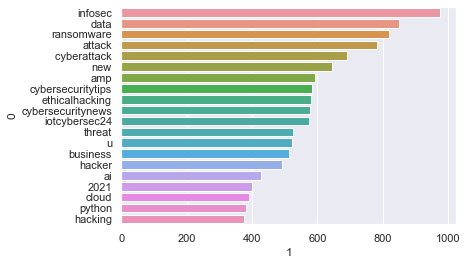

In [86]:
sns.barplot(data = freq_data, x = 1, y = 0);

In [119]:
most_common = []

for key in fdist.most_common(20):
    most_common.append(key[0])
    
print(most_common)

['infosec', 'data', 'ransomware', 'attack', '\xa0cyberattack', 'new', 'amp', 'cybersecuritytips', 'ethicalhacking', 'cybersecuritynews', 'iotcybersec24', 'threat', 'u', 'business', 'hacker', 'ai', '2021', 'cloud', 'python', 'hacking']


#### Description Data

In [88]:
desc_words = []

for row in desc['description']:
    for word in str(row).split(" "):
        desc_words.append(word)
        
desc_words[:5]

['leader', 'news', 'hacker', 'hacking', 'techjobs']

In [89]:
len(desc_words)

65033

In [90]:
from nltk.probability import FreqDist
fdist_desc = FreqDist()
for word in desc_words:
    fdist_desc[word]+=1
fdist_desc

FreqDist({'business': 651, 'technology': 531, 'service': 505, 'solution': 496, 'news': 355, 'digital': 322, 'tech': 315, 'data': 312, 'cloud': 265, 'company': 247, ...})

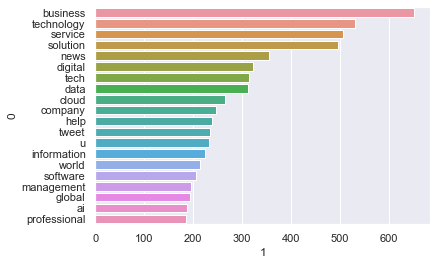

In [91]:
freq_data_desc = pd.DataFrame.from_dict(fdist_desc.most_common(20))
sns.barplot(data = freq_data_desc, x = 1, y = 0);

In [92]:
most_common_desc = []

for key in fdist_desc.most_common(20):
    most_common_desc.append(key[0])
    
most_common_desc

['business',
 'technology',
 'service',
 'solution',
 'news',
 'digital',
 'tech',
 'data',
 'cloud',
 'company',
 'help',
 'tweet',
 'u',
 'information',
 'world',
 'software',
 'management',
 'global',
 'ai',
 'professional']

## Clustering | By Text

### Finding K

In [93]:
#Creating a function that takes in a range of values for K (or how many clusters)
# runs the model and then outputs the inertia value so we can see how well the clusters are grouped 


def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(text_vec)
    return estimator_kmeans.inertia_

In [94]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
CPU times: user 12min 17s, sys: 12.3 s, total: 12min 29s
Wall time: 2min 38s


In [95]:
results_k

{1: 118806.57739999896,
 2: 115440.28995546038,
 3: 112767.03257778674,
 4: 111975.44960530021,
 5: 110550.32522379082,
 6: 109716.8850752275,
 7: 109440.5374531263,
 8: 108727.66821256765}

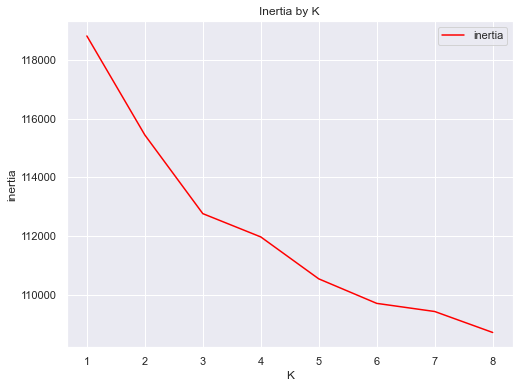

In [96]:
# we can now plot this to see where the inflection point is or where adding more clusters doesnt really add to gaining
# more information from extra clusters

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

### Cluster Analysis

In [97]:
estimator_kmeans = KMeans(random_state=42, n_clusters=7) # making it 7 now to see what happens

estimator_kmeans.fit(text_vec) 

KMeans(n_clusters=7, random_state=42)

In [98]:
text_vec["cluster_id"] = estimator_kmeans.labels_
text_vec.head()

,000,002002,0027,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,013052,013105,013124,013125,...,zta,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zyxel,zyz,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [99]:
text_clusters = text_vec.groupby('cluster_id').sum()
text_clusters.head()

,000,002002,0027,004002,006,00b328bc1cf5221fc6efb560c6bb764922c31e002179799da67f1f68a503ca41,013052,013105,013124,013125,...,zscaler,zta,ztna,zuckerbergstyle,zum,zumbullaw,zurich,zwatest,zyxel,zyz
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7.0,1.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0


In [100]:
text_clusters_20 = text_clusters[['infosec',
 'data',
 'ransomware',
 'attack',
 'cyberattack',
 'new',
 'amp',
 'cybersecuritytips',
 'ethicalhacking',
 'cybersecuritynews',
 'iotcybersec24',
 'threat',
 'business',
 'hacker',
 'ai',
 '2021',
 'cloud',
 'python',
 'hacking']
]

text_clusters_20.head() # only focusing on top 20 post popular words ('u' not in data frame oddly)

,infosec,data,ransomware,attack,cyberattack,new,amp,cybersecuritytips,ethicalhacking,cybersecuritynews,iotcybersec24,threat,business,hacker,ai,2021,cloud,python,hacking
cluster_id,,,,,,,,,,,,,,,,,,,
0,9.0,6.0,2.0,16.0,23.0,6.0,13.0,0.0,0.0,0.0,0.0,6.0,6.0,2.0,0.0,19.0,3.0,2.0,0.0
1,17.0,11.0,17.0,12.0,6.0,17.0,8.0,0.0,0.0,0.0,0.0,7.0,9.0,19.0,9.0,12.0,6.0,2.0,202.0
2,573.0,10.0,0.0,2.0,0.0,3.0,0.0,573.0,573.0,573.0,573.0,0.0,13.0,2.0,3.0,17.0,6.0,32.0,7.0
3,27.0,29.0,71.0,0.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,8.0,16.0,211.0,6.0,18.0,211.0,0.0
4,326.0,633.0,0.0,0.0,689.0,507.0,411.0,15.0,6.0,6.0,0.0,320.0,377.0,344.0,239.0,357.0,318.0,111.0,133.0


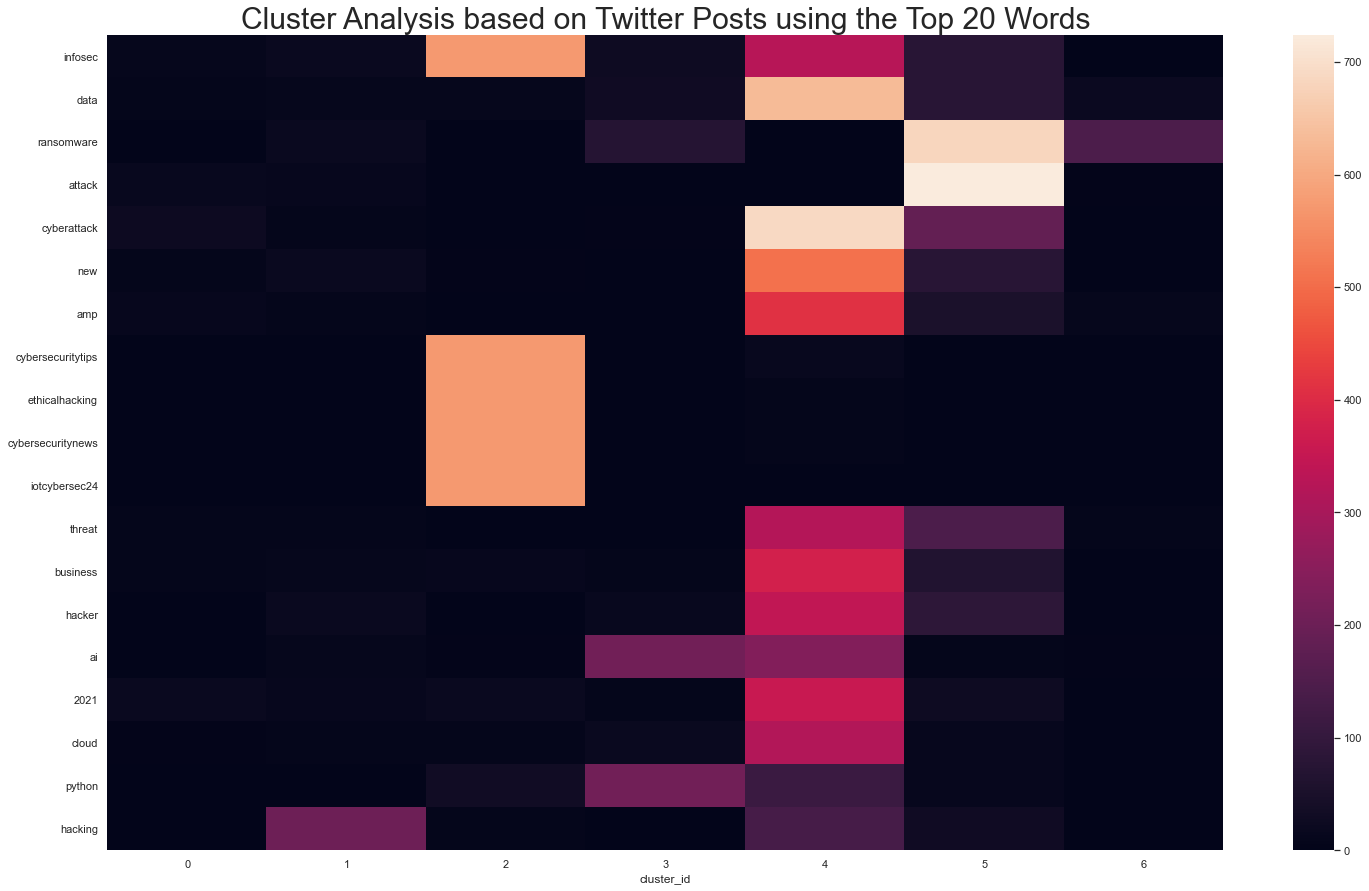

In [101]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(text_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Posts using the Top 20 Words", size = 30);
# Look for rows with a lot of variation to see defining features

## Clustering | By description

### Finding K

In [102]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(desc_vec)
    return estimator_kmeans.inertia_

In [103]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
CPU times: user 7min 58s, sys: 9.67 s, total: 8min 8s
Wall time: 1min 40s


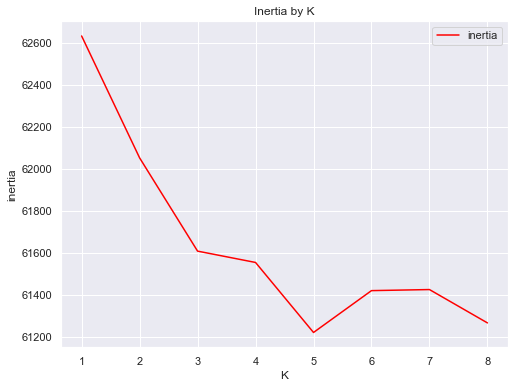

In [104]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

### Cluster Analysis

In [105]:
estimator_kmeans = KMeans(random_state=42, n_clusters=5) # 5 for now (the elbow curve is janky)

estimator_kmeans.fit(desc_vec) 

KMeans(n_clusters=5, random_state=42)

In [106]:
desc_vec["cluster_id"] = estimator_kmeans.labels_
desc_vec.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,àrea,área,économique,énfasis,ïgh,ïñ,ñuñoando,österreich,þlåïñ,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [107]:
desc_clusters = desc_vec.groupby('cluster_id').sum()
desc_clusters.head()

,001,0099,01,01100101,01100111,01101000,01101111,01110010,01110100,0121,...,zyxel,àrea,área,économique,énfasis,ïgh,ïñ,ñuñoando,österreich,þlåïñ
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
desc_clusters_20 = desc_clusters[['business',
 'technology',
 'service',
 'solution',
 'news',
 'digital',
 'tech',
 'data',
 'cloud',
 'company',
 'help',
 'tweet',
 'information',
 'world',
 'software',
 'management',
 'global',
 'ai',
 'professional']]

desc_clusters_20

,business,technology,service,solution,news,digital,tech,data,cloud,company,help,tweet,information,world,software,management,global,ai,professional
cluster_id,,,,,,,,,,,,,,,,,,,
0,14.0,21.0,51.0,85.0,3.0,10.0,7.0,16.0,25.0,5.0,4.0,2.0,5.0,9.0,13.0,9.0,14.0,3.0,5.0
1,0.0,304.0,0.0,0.0,262.0,213.0,237.0,183.0,136.0,125.0,147.0,176.0,151.0,164.0,119.0,112.0,114.0,164.0,125.0
2,487.0,81.0,0.0,84.0,37.0,40.0,38.0,25.0,24.0,33.0,48.0,7.0,27.0,15.0,19.0,22.0,25.0,11.0,14.0
3,84.0,54.0,366.0,18.0,14.0,20.0,9.0,17.0,36.0,37.0,19.0,3.0,22.0,9.0,16.0,24.0,19.0,5.0,26.0
4,1.0,45.0,42.0,288.0,3.0,16.0,13.0,27.0,26.0,43.0,16.0,2.0,11.0,13.0,29.0,20.0,15.0,3.0,13.0


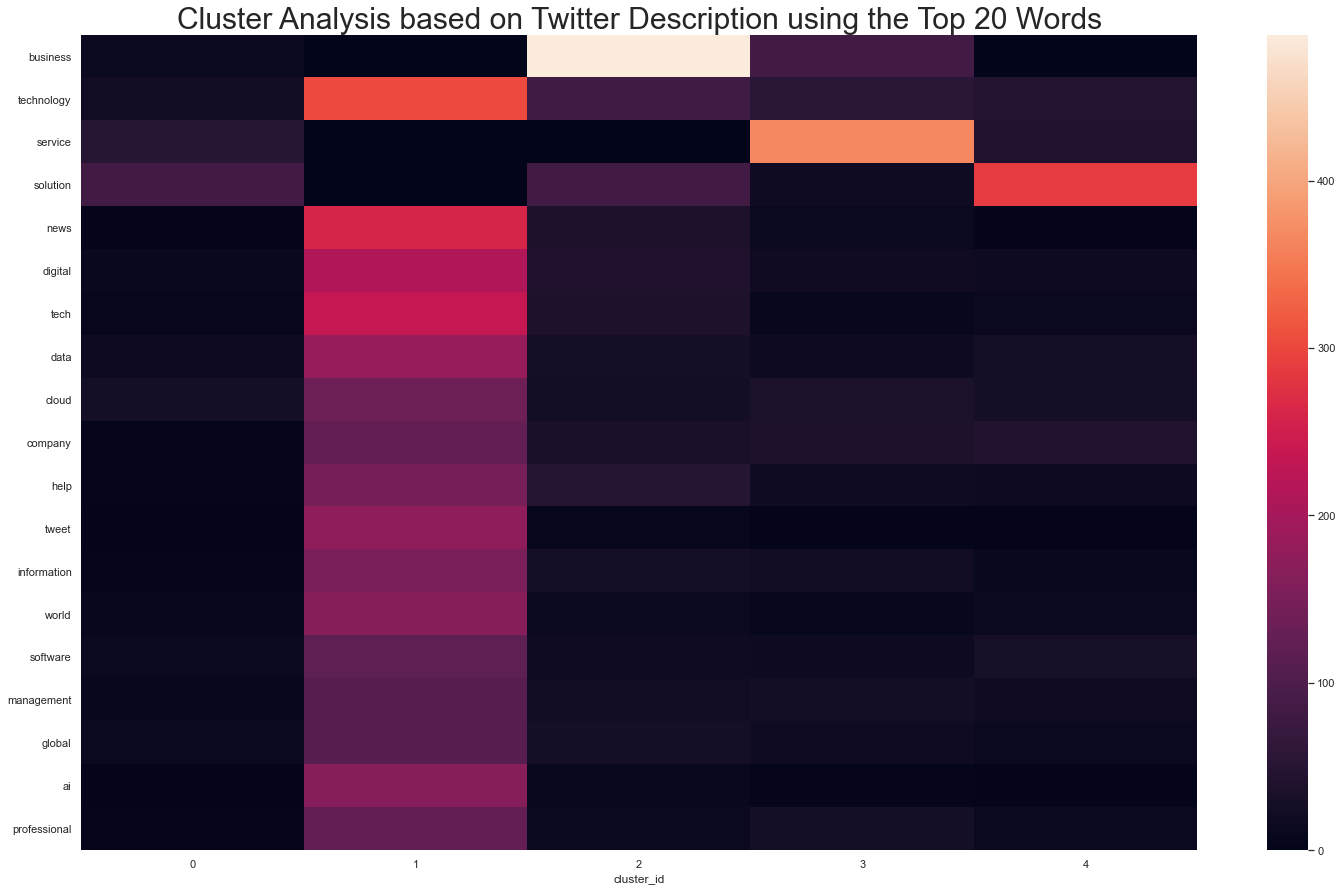

In [109]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(desc_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Description using the Top 20 Words", size = 30);
# Look for rows with a lot of variation to see defining features

## Vader Analysis

In [114]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [117]:
for word in most_common:
...     print(word)
...     ss = sid.polarity_scores(word)
...     for k in sorted(ss):
...         print('{0}: {1}, '.format(k, ss[k]), end='')
...     print()

infosec
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
data
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ransomware
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
attack
compound: -0.4767, neg: 1.0, neu: 0.0, pos: 0.0, 
 cyberattack
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
new
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
amp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
cybersecuritytips
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ethicalhacking
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
cybersecuritynews
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
iotcybersec24
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
threat
compound: -0.5267, neg: 1.0, neu: 0.0, pos: 0.0, 
u
compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
business
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
hacker
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ai
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2021
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
cloud
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
python
c

In [118]:
for word in most_common_desc:
...     print(word)
...     ss = sid.polarity_scores(word)
...     for k in sorted(ss):
...         print('{0}: {1}, '.format(k, ss[k]), end='')
...     print()

business
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
technology
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
service
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
solution
compound: 0.3182, neg: 0.0, neu: 0.0, pos: 1.0, 
news
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
digital
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
tech
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
data
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
cloud
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
company
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
help
compound: 0.4019, neg: 0.0, neu: 0.0, pos: 1.0, 
tweet
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
u
compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
information
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
world
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
software
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
management
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
global
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
ai
compound: 0.0, neg: 0.0, neu: 1

In [36]:
#comment hello 